In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


%matplotlib inline

In [2]:
#import data

fe      = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.7to74.2MHz_100pts_Fe_con_10e6_permb_5000_permt_1.txt',
            skiprows=5, usecols=1)
cu      = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.86to73.9MHz_250pts_CU_con_57e6_permb_1_permt_1.txt',
            skiprows=5, usecols=1)
pl      = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.87to73.89MHz_250pts_Pl_con_57e6_permb_1_permt_1.txt',
            skiprows=5, usecols=1)
zn      = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.7to74.2MHz_100pts_ZnSt_con_10e6_permb_1000_permt_1.txt',
            skiprows=5, usecols=1)
            
freqs   = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.7to74.2MHz_100pts_ZnSt_con_10e6_permb_1000_permt_1.txt',
            skiprows=5, usecols=0)
freqsCu = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.86to73.9MHz_250pts_CU_con_57e6_permb_1_permt_1.txt',
            skiprows=5, usecols=0)
freqsPl = np.loadtxt('dataSets_1.5.23/averageE_125pts_73.87to73.89MHz_250pts_Pl_con_57e6_permb_1_permt_1.txt',
            skiprows=5, usecols=0)



Text(0, 0.5, 'Log10(Avg E)')

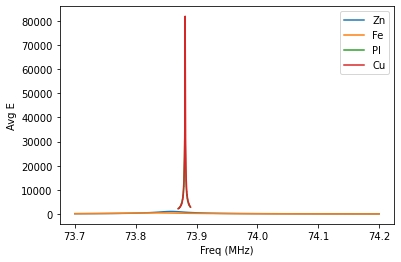

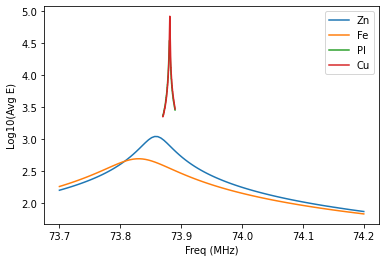

In [3]:
#plot raw data

plt.close('all')

plt.plot(freqs, zn, label = 'Zn')
plt.plot(freqs, fe, label = 'Fe')
plt.plot(freqsPl, pl, label = 'Pl')
plt.plot(freqsCu, cu, label = 'Cu')
plt.legend()
plt.xlabel('Freq (MHz)')
plt.ylabel('Avg E')

plt.figure()
plt.plot(freqs, np.log10(zn), label = 'Zn')
plt.plot(freqs, np.log10(fe), label = 'Fe')
plt.plot(freqsPl, np.log10(pl), label = 'Pl')
plt.plot(freqsCu, np.log10(cu), label = 'Cu')
plt.legend()
plt.xlabel('Freq (MHz)')
plt.ylabel('Log10(Avg E)')

In [4]:
#def functions for curve fit

def lorentzian(x, a, x0, gamma):
    return a * 1/np.pi * (1/2*gamma)/((x-x0)**2 +(1/2*gamma)**2)

#eq 8.90 jackson 3rd edition
#note, he defines a frequency shift away from x0 as delta x. I lump in the shift to x0
#also, I added a multplier
def jackson(x, a, x0, Q):
    return (a * (1/((x-x0)**2 +(x0/(2*Q))**2)))**(1/2)

##############################################
Material = Iron
a  =   629.8387559578563 +- 0.04233131789851893
x0 =  73.82999150174912 +- 1.092774120415855e-10
Q  =   717.8386511907927 +- 0.030679364031642727

##############################################
Material = Zn Steel
a  =   629.7041564265714 +- 0.04208384324205535
x0 =  73.8585534561215 +- 3.018581608750108e-11
Q  =   1604.6063333663153 +- 0.17006569345890338

##############################################
Material = Pl
a  =   628.6395220308993 +- 0.8875743654334637
x0 =  73.88088638400664 +- 6.829934079320969e-13
Q  =   50782.40285185328 +- 3682.1538950143163

##############################################
Material = Cu
a  =   630.2058715265398 +- 1.4365218993468116
x0 =  73.8813068431653 +- 2.1243207479863988e-13
Q  =   120725.36826643314 +- 34450.83966203177


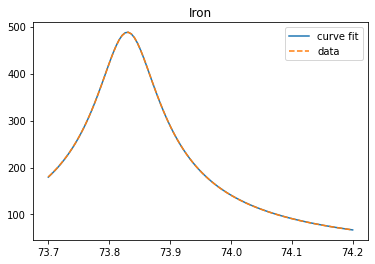

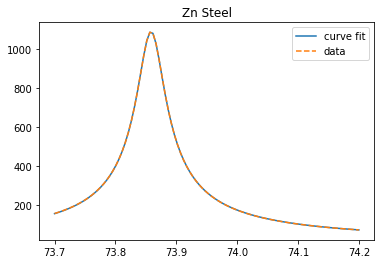

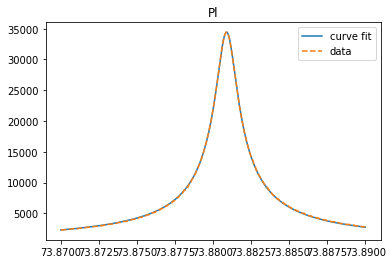

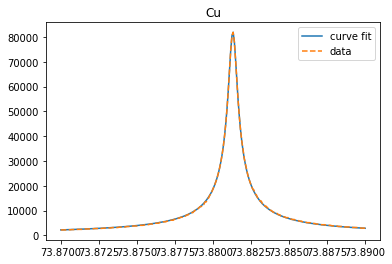

In [5]:
#curve fit and plot everything

popt, pcov = curve_fit(jackson, freqs, fe, bounds=(0,[10000, 80, 10000]))
plt.figure()
plt.title('Iron')
plt.plot(freqs, jackson(freqs, popt[0], popt[1], popt[2]), label = 'curve fit')
plt.plot(freqs, fe, '--', label = 'data')
plt.legend()

print('##############################################')
print('Material = Iron')
print('a  =  ', popt[0], '+-', pcov[0,0])
print('x0 = ', popt[1], '+-', pcov[1,1])
print('Q  =  ', popt[2], '+-', pcov[2,2])
print()

popt, pcov = curve_fit(jackson, freqs, zn, bounds=(0,[10000, 80, 10000]))

plt.figure()
plt.title('Zn Steel')
plt.plot(freqs, jackson(freqs, popt[0], popt[1], popt[2]), label = 'curve fit')
plt.plot(freqs, zn, '--', label = 'data')
plt.legend()

print('##############################################')
print('Material = Zn Steel')
print('a  =  ', popt[0], '+-', pcov[0,0])
print('x0 = ', popt[1], '+-', pcov[1,1])
print('Q  =  ', popt[2], '+-', pcov[2,2])
print()

popt, pcov = curve_fit(jackson, freqsPl, pl, bounds=([300,73.8,10000],[700, 73.9, 100000]))

plt.figure()
plt.title('Pl')
plt.plot(freqsPl, jackson(freqsPl, popt[0], popt[1], popt[2]), label = 'curve fit')
plt.plot(freqsPl, pl, '--', label = 'data')
plt.legend()

print('##############################################')
print('Material = Pl')
print('a  =  ', popt[0], '+-', pcov[0,0])
print('x0 = ', popt[1], '+-', pcov[1,1])
print('Q  =  ', popt[2], '+-', pcov[2,2])
print()

popt, pcov = curve_fit(jackson, freqsCu, cu, bounds=([500,73.88,10000],[1000, 73.89, 200000]))

plt.figure()
plt.title('Cu')
plt.plot(freqsCu, jackson(freqsCu, popt[0], popt[1], popt[2]), label = 'curve fit')
plt.plot(freqsCu, cu, '--', label = 'data')
plt.legend()

print('##############################################')
print('Material = Cu')
print('a  =  ', popt[0], '+-', pcov[0,0])
print('x0 = ', popt[1], '+-', pcov[1,1])
print('Q  =  ', popt[2], '+-', pcov[2,2])



In [ ]:
#demo of curve fit
popt, pcov = curve_fit(jackson, freqsCu, cu, bounds=([500,73.88,10000],[1000, 73.89, 200000]))

print('a =  ', popt[0])
print('x0 = ', popt[1])
print('Q =  ', popt[2])

plt.figure()
#plt.plot(freqs, (jackson(freqs, 1000, 73.86, 2000)), label ='curvefit')
plt.plot(freqsCu, jackson(freqsCu, popt[0], popt[1], popt[2]), label = 'curve fit')
plt.plot(freqsCu,cu, '--', label = 'data')
plt.legend()

In [ ]:
#manually ply with parameters
plt.figure()
plt.plot(freqsCu, cu)
plt.plot(freqsCu, (jackson(freqsCu, 1000, 73.8821, 100000)), label ='curvefit')
plt.legend()

In [ ]:
pcov